In [164]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [20]:
# 맥북 
data = pd.read_csv('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/마케팅 애널리틱스/중간 과제/직방 competition data 4/train.csv')

OSError: [Errno 22] Invalid argument: '/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/마케팅 애널리틱스/중간 과제/직방 competition data 4/train.csv'

In [165]:
# 윈도우 
data = pd.read_csv('C:/Users/Innovation/Desktop/김동요/jupyter/Data/MA/직방 competition data 4/직방 competition data 4/train.csv')

In [166]:
data.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   key                                 1601458 non-null  int64  
 1   apartment_id                        1601458 non-null  int64  
 2   city                                1601458 non-null  int64  
 3   transaction_year_month              1601458 non-null  int64  
 4   transaction_date                    1601458 non-null  object 
 5   year_of_completion                  1601458 non-null  int64  
 6   exclusive_use_area                  1601458 non-null  float64
 7   floor                               1601458 non-null  int64  
 8   latitude                            1601458 non-null  float64
 9   longitude                           1601458 non-null  float64
 10  address_by_law                      1601458 non-null  int64  
 11  total_parki

In [5]:
# EDA에 추가 
# sns.distplot(data['transaction_real_price'])
# plt.title('Original Sale Price Histogram')
# plt.show()

In [6]:
# EDA에 추가 
# plt.title('Log Transformed Sale Price Histogram')
# log_SalePrice = np.log1p(data['transaction_real_price'])
# sns.distplot(log_SalePrice)
# plt.show()

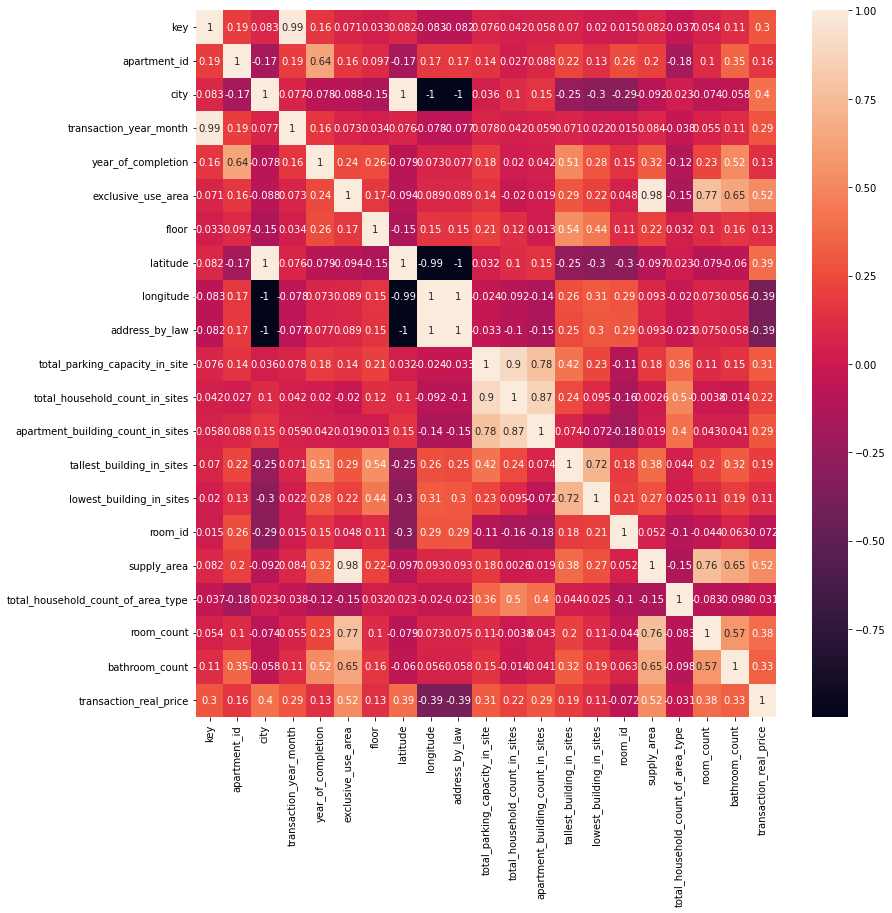

In [7]:
# EDA에 추가 & 다중공선성 파악  
plt.figure(figsize=(13, 13))
sns.heatmap(data.corr(), annot=True)
plt.show()

## 새로운 열 추가 

In [168]:
sub2 = pd.read_excel('C:/Users\/Innovation\/Desktop/김동요/jupyter/Data/MA/Subways2.xlsx')

In [169]:
sub2

,station_id,latitude,longitude,subway_line,address_by_law,station,main_line
0,1,37.555729,126.972145,"1,4,KJ,AP",1114012000,서울역,1호선
1,2,37.565624,126.976936,"1,2",1114016700,시청역,1호선
2,3,37.570169,126.983099,1,1111012600,종각역,1호선
3,4,37.571570,126.991895,"1,3,5",1111015600,종로3가역,1호선
4,5,37.570988,127.001921,1,1111016300,종로5가역,1호선
...,...,...,...,...,...,...,...
400,1153,35.181824,129.177139,BD,2635010700,신해운대역,동해선
401,1154,35.187515,129.202362,BD,2635010800,송정역,동해선
402,1155,35.196297,129.208817,BD,2671025000,오시리아역,동해선
403,1156,35.242882,129.218506,BD,2671025000,기장역,동해선


In [170]:
# left 조인  
data = pd.merge(data, sub2, left_on='address_by_law', right_on='address_by_law', how='left')

In [171]:
# 하버시안 공식으로 이용해서 지하철역의 위도, 경도와 아파트의 위도, 경도 사이의 거리 측정

from haversine import haversine

In [172]:
dis = []
for i in range(len(data)):
    apart_where = (data.latitude_x[i], data.longitude_x[i])
    sub_where = (data.latitude_y[i], data.longitude_y[i])
    
    a = haversine(apart_where, sub_where)
    dis.append(a)



In [173]:
data['지하철 역까지의 거리'] = np.array(dis).reshape(-1 ,1)

In [174]:
# 해당 평형의 방을 이용하는 세대수가  전체 입주 세대수에서 얼마나 차지하는지 나타냄 
household_ratio = data.total_household_count_of_area_type / data.total_household_count_in_sites 
data['해당 평형 이용 세대수 비율'] = household_ratio

# 해당 방의 평수를 나타냄 
feet_3025 = round(data.exclusive_use_area * 0.3025, 4)
data['방 평수'] = feet_3025

# 평당 가격 
price_3025 = round(data.transaction_real_price / feet_3025, 4)
data['평당 가격'] = price_3025

# 공급면적(전용면적 + 주거공용면적)의 평수 
supply_3025 = round(data.supply_area * 0.3025, 4)
data['공급 면적 평수'] = supply_3025

# 계약 년 & 월 
transaction_year = data.transaction_year_month.apply(lambda x: str(x)[0:4])
data['transcation_year'] = transaction_year + '년'
transaction_month = data.transaction_year_month.apply(lambda x: str(x)[4:6])
data['transcation_month'] = transaction_month + '월'

transaction_date = transaction_year + "-" + transaction_month + "-01"
transaction_date = transaction_date.astype('datetime64')
data['transaction_date'] = transaction_date

# 계약연도와 아파트 준공년도의 차이(아파트 나이)
apartment_age = data.transaction_year_month.apply(lambda x: int(str(x)[0:4])) - data.year_of_completion + 1
data['거래연도 기준 아파트 나이'] = apartment_age

# 아파트 층 수 높이 순위(최고층 - 해당 방의 층 + 1)
floor_rank = data.tallest_building_in_sites - data.floor + 1
data['층 순위'] = floor_rank


In [175]:
data['floor'] = data['floor'].astype('float64')

In [176]:
rate = []
for i in range(len(data)):
    if data['floor'][i] <= (0.3333 * data['tallest_building_in_sites'][i]): 
        rate.append('Low')
    elif data['floor'][i] >= (0.3333 * data['tallest_building_in_sites'][i]): 
        rate.append('Royal')
    else:
        rate.append('Medium')

In [177]:
data['층 등급'] = np.array(rate).reshape(-1 ,1)

In [178]:
data = data.loc[data['city'] == 1, :]

In [189]:
data['city'].value_counts()

1    2055106
Name: city, dtype: int64

In [179]:
data.shape

(2055106, 41)

In [180]:
data.corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price                1.000000
평당 가격                                 0.793404
방 평수                                  0.662246
exclusive_use_area                    0.662246
공급 면적 평수                              0.658258
supply_area                           0.658258
room_count                            0.490970
bathroom_count                        0.407848
address_by_law                        0.387423
tallest_building_in_sites             0.311801
total_parking_capacity_in_site        0.301164
apartment_id                          0.281405
key                                   0.266540
apartment_building_count_in_sites     0.262673
transaction_year_month                0.256916
lowest_building_in_sites              0.231984
floor                                 0.166637
total_household_count_in_sites        0.163299
층 순위                                  0.156736
year_of_completion                    0.134483
longitude_x                           0.085774
longitude_y  

In [181]:
data.corr()['평당 가격'].sort_values(ascending=False)

평당 가격                                 1.000000
transaction_real_price                0.793404
address_by_law                        0.459152
apartment_building_count_in_sites     0.412623
total_parking_capacity_in_site        0.358256
key                                   0.331469
transaction_year_month                0.318519
total_household_count_in_sites        0.293148
apartment_id                          0.269575
tallest_building_in_sites             0.213129
lowest_building_in_sites              0.176315
방 평수                                  0.173609
exclusive_use_area                    0.173609
공급 면적 평수                              0.169065
supply_area                           0.169065
room_count                            0.140440
longitude_x                           0.128749
bathroom_count                        0.128135
floor                                 0.120363
longitude_y                           0.111105
층 순위                                  0.101145
거래연도 기준 아파트 나

In [182]:
print('데이터 세트의 Shape:', data.shape)
print('\n전체 피처의 type: \n', data.dtypes.value_counts())
isnull_series = data.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (2055106, 41)

전체 피처의 type: 
 float64           19
int64             12
object             9
datetime64[ns]     1
dtype: int64

Null 칼럼과 그 건수:
  station_id                        187493
latitude_y                        187493
longitude_y                       187493
subway_line                       187493
station                           187493
main_line                         187493
지하철 역까지의 거리                       187493
total_parking_capacity_in_site    104584
front_door_structure               16158
heat_fuel                          13202
room_count                          1271
bathroom_count                      1271
heat_type                            895
tallest_building_in_sites              9
lowest_building_in_sites               9
층 순위                                   9
dtype: int64


In [183]:
data.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude_x', 'longitude_x', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'station_id', 'latitude_y', 'longitude_y', 'subway_line', 'station',
       'main_line', '지하철 역까지의 거리', '해당 평형 이용 세대수 비율', '방 평수', '평당 가격',
       '공급 면적 평수', 'transcation_year', 'transcation_month', '거래연도 기준 아파트 나이',
       '층 순위', '층 등급'],
      dtype='object')

## 데이터 셋 설정 및 구분 

In [184]:
# EDA & 태블로 시각화용 데이터 

# null이 너무 많은 컬럼과 불필요한 컬럼 삭제
tru_data = data.drop(['transaction_year_month', 'total_parking_capacity_in_site',  'room_id', 'front_door_structure','heat_type', 'heat_fuel'], axis=1)

tru_data.dropna(how='any', inplace=True)

In [185]:
print('데이터 세트의 Shape:', tru_data.shape)
print('\n전체 피처의 type: \n', tru_data.dtypes.value_counts())
isnull_series = tru_data.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1866333, 35)

전체 피처의 type: 
 float64           18
int64             10
object             6
datetime64[ns]     1
dtype: int64

Null 칼럼과 그 건수:
  Series([], dtype: int64)


In [186]:
tru_data.reset_index(drop=True, inplace=True)

In [187]:
# 데이터 csv파일로 추출 
tru_data.to_csv('EDA_dataset.csv')

In [190]:
tru_data.city

1    1866333
Name: city, dtype: int64

In [16]:
data.corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price                1.000000
평당 가격                                 0.825508
공급 면적 평수                              0.521845
supply_area                           0.521845
방 평수                                  0.518922
exclusive_use_area                    0.518922
city                                  0.399349
latitude                              0.386292
room_count                            0.383066
bathroom_count                        0.331598
total_parking_capacity_in_site        0.310130
key                                   0.296135
apartment_building_count_in_sites     0.290689
transaction_year_month                0.285657
total_household_count_in_sites        0.216658
tallest_building_in_sites             0.193310
apartment_id                          0.160393
year_of_completion                    0.132442
floor                                 0.129241
lowest_building_in_sites              0.113520
층 순위                                  0.097949
거래연도 기준 아파트 나

In [68]:
# SPSS 과제용 데이터 

spss_data = data[['transaction_real_price', 'exclusive_use_area', 'room_count', 'bathroom_count', 'total_parking_capacity_in_site']]
spss_data.dropna(how='any', inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20868\4260493915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spss_data.dropna(how='any', inplace=True)


In [71]:
spss_data = spss_data.iloc[:1001, :]
spss_data.head()

,transaction_real_price,exclusive_use_area,room_count,bathroom_count,total_parking_capacity_in_site
0,215000000,47.43,1.0,1.0,163.0
1,200000000,44.37,2.0,1.0,163.0
2,168000000,54.70,2.0,1.0,902.0
3,165000000,64.66,2.0,1.0,902.0
4,280000000,106.62,4.0,2.0,902.0


In [72]:
spss_data.isnull().sum()

transaction_real_price            0
exclusive_use_area                0
room_count                        0
bathroom_count                    0
total_parking_capacity_in_site    0
dtype: int64

In [73]:
print('데이터 세트의 Shape:', spss_data.shape)
print('\n전체 피처의 type: \n', spss_data.dtypes.value_counts())
isnull_series = spss_data.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1001, 5)

전체 피처의 type: 
 float64    4
int64      1
dtype: int64

Null 칼럼과 그 건수:
  Series([], dtype: int64)


In [75]:
spss_data.to_excel('spss용 데이터셋.xlsx')

In [85]:
#  'transaction_real_price' 로그 변환 
# original_SalePrice = data['transaction_real_price']
# data['transaction_real_price'] = np.log1p(data['transaction_real_price'])

# Null이 너무 많은 컬럼과 불필요한 컬럼 삭제
tru_data = data.drop(['key', 'apartment_id', 'address_by_law', 'longitude', 'latitude', 'total_parking_capacity_in_site', 'front_door_structure','heat_type', 'heat_fuel', 'transaction_year_month', 'year_of_completion'], axis=1)


data.dropna(how='any', inplace=True)



In [88]:
data.exclusive_use_area = data.exclusive_use_area * 0.3025
data.supply_area = data.supply_area * 0.3025

In [89]:
# 평당 거래가를 구하기 위해 종속변수를 전체 평으로 나눠줌 
data.transaction_real_price = (data.transaction_real_price / data.exclusive_use_area)

In [90]:
data.head()

,city,exclusive_use_area,floor,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
0,1,14.347575,6,136,1,8.0,4.0,91120,19.853075,46,1.0,1.0,1.498511e+07
1,1,13.421925,8,136,1,8.0,4.0,91119,18.570475,10,2.0,1.0,1.490099e+07
2,1,16.546750,8,585,5,14.0,9.0,8430,21.888900,201,2.0,1.0,1.015305e+07
3,1,19.559650,11,919,7,15.0,11.0,5839,26.408250,284,2.0,1.0,8.435734e+06
4,1,32.252550,7,919,7,15.0,11.0,5836,38.641350,112,4.0,2.0,8.681484e+06


In [92]:
data.corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price                1.000000
city                                  0.546481
apartment_building_count_in_sites     0.398447
total_household_count_in_sites        0.307655
supply_area                           0.083725
exclusive_use_area                    0.073812
bathroom_count                        0.073110
tallest_building_in_sites             0.067774
floor                                 0.052553
room_count                            0.047320
total_household_count_of_area_type    0.046928
lowest_building_in_sites              0.006676
room_id                              -0.136317
Name: transaction_real_price, dtype: float64

In [75]:
data.corr()['transaction_real_price'].sort_values(ascending=False)

transaction_real_price                1.000000
supply_area                           0.521792
exclusive_use_area                    0.518895
city                                  0.399426
room_count                            0.383066
bathroom_count                        0.331597
apartment_building_count_in_sites     0.290652
total_household_count_in_sites        0.216589
tallest_building_in_sites             0.193204
floor                                 0.129192
lowest_building_in_sites              0.113397
total_household_count_of_area_type   -0.030709
room_id                              -0.071414
Name: transaction_real_price, dtype: float64

In [37]:
print('get_dummies() 수행 전 데이터 Shape:', data.shape)
data_ohe = pd.get_dummies(data)
print('get_dummies() 수행 후 데이터 Shape: ', data_ohe.shape)

null_column_count = data_ohe.isnull().sum()[data_ohe.isnull().sum() > 0]
print('## Null 피처의 Type : \n', data_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1600758, 15)
get_dummies() 수행 후 데이터 Shape:  (1600758, 20)
## Null 피처의 Type : 
 Series([], dtype: object)


In [38]:
data_ohe

,city,transaction_year_month,year_of_completion,exclusive_use_area,floor,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price,transaction_date_11~20,transaction_date_1~10,transaction_date_21~28,transaction_date_21~29,transaction_date_21~30,transaction_date_21~31
0,1,200601,1999,47.4300,6,136,1,8.0,4.0,65.63,46,1.0,1.0,215000000,1,0,0,0,0,0
1,1,200601,1999,44.3700,8,136,1,8.0,4.0,61.39,10,2.0,1.0,200000000,1,0,0,0,0,0
2,1,200601,1992,54.7000,8,585,5,14.0,9.0,72.36,201,2.0,1.0,168000000,1,0,0,0,0,0
3,1,200601,1993,64.6600,11,919,7,15.0,11.0,87.30,284,2.0,1.0,165000000,1,0,0,0,0,0
4,1,200601,1993,106.6200,7,919,7,15.0,11.0,127.74,112,4.0,2.0,280000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601453,0,201810,1999,118.4700,14,819,8,27.0,13.0,143.45,108,4.0,2.0,427000000,0,0,0,0,0,1
1601454,1,201810,2007,59.9900,4,1122,22,15.0,8.0,79.98,254,3.0,2.0,771000000,0,0,0,0,0,1
1601455,0,201810,2014,84.9669,31,1326,9,35.0,27.0,109.77,209,3.0,2.0,343000000,0,0,0,0,0,1
1601456,1,201810,1996,59.3400,4,107,1,19.0,11.0,88.37,4,3.0,1.0,485000000,0,0,0,0,0,1
